In [22]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import torch.optim as optim

In [2]:
#datasets and dataloaders 
import torchvision
import torchvision.transforms as transforms 
#output of torchvision pkg are pil image of range [0,1]. transforms to tensor of normalised range[-1,1] 

In [ ]:
n_epochs = 3
batch_size_train = 64
batch_size_test = 1000
learning_rate = 0.01
momentum = 0.5
log_interval = 10

random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

In [23]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x=F.dropout(x,training=self.training)
        x=self.fc2(x)
        return F.log_softmax(x)

In [24]:
network=Net()
optimizer=optim.SGD(network.parameters(),lr=learning_rate,momentum=momentum)

In [25]:
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]

In [26]:
def train(epoch):
  network.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    output = network(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % log_interval == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset),
        100. * batch_idx / len(train_loader), loss.item()))
      train_losses.append(loss.item())
      train_counter.append(
        (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
      torch.save(network.state_dict(), '/Users/anujatayal/Documents/codes/model.pth')
      torch.save(optimizer.state_dict(), '/Users/anujatayal/Documents/codes/optimizer.pth')

In [27]:
def test():
  network.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      output = network(data)
      test_loss += F.nll_loss(output, target, size_average=False).item()
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

In [28]:
test()
for epoch in range(1, n_epochs + 1):
  train(epoch)
  test()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/torch/nn/_reduction.py:46: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Avg. loss: 2.3309, Accuracy: 806/10000 (8%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.370831
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.345562
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.287033
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.261512
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.246576
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.227893
Train Epoch: 1 [3840/60000 (6%)]	Loss: 2.247630
Train Epoch: 1 [4480/60000 (7%)]	Loss: 2.175467
Train Epoch: 1 [5120/60000 (9%)]	Loss: 2.174043
Train Epoch: 1 [5760/60000 (10%)]	Loss: 2.146127
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.153553
Train Epoch: 1 [7040/60000 (12%)]	Loss: 2.083349
Train Epoch: 1 [7680/60000 (13%)]	Loss: 1.871321
Train Epoch: 1 [8320/60000 (14%)]	Loss: 1.761927
Train Epoch: 1 [8960/60000 (15%)]	Loss: 1.660498
Train Epoch: 1 [9600/60000 (16%)]	Loss: 1.524118
Train Epoch: 1 [10240/60000 (17%)]	Loss: 1.488129
Train Epoch: 1 [10880/60000 (18%)]	Loss: 1.348530
Train Epoch: 1 [11520/60000 (19%)]	Loss: 1.326029
Train Epoch: 1 [12160/6

Train Epoch: 2 [44160/60000 (74%)]	Loss: 0.295547
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.342177
Train Epoch: 2 [45440/60000 (76%)]	Loss: 0.429554
Train Epoch: 2 [46080/60000 (77%)]	Loss: 0.342350
Train Epoch: 2 [46720/60000 (78%)]	Loss: 0.267260
Train Epoch: 2 [47360/60000 (79%)]	Loss: 0.522537
Train Epoch: 2 [48000/60000 (80%)]	Loss: 0.261616
Train Epoch: 2 [48640/60000 (81%)]	Loss: 0.197961
Train Epoch: 2 [49280/60000 (82%)]	Loss: 0.223912
Train Epoch: 2 [49920/60000 (83%)]	Loss: 0.477524
Train Epoch: 2 [50560/60000 (84%)]	Loss: 0.226046
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.152290
Train Epoch: 2 [51840/60000 (86%)]	Loss: 0.216164
Train Epoch: 2 [52480/60000 (87%)]	Loss: 0.396627
Train Epoch: 2 [53120/60000 (88%)]	Loss: 0.590171
Train Epoch: 2 [53760/60000 (90%)]	Loss: 0.564205
Train Epoch: 2 [54400/60000 (91%)]	Loss: 0.330463
Train Epoch: 2 [55040/60000 (92%)]	Loss: 0.409339
Train Epoch: 2 [55680/60000 (93%)]	Loss: 0.532534
Train Epoch: 2 [56320/60000 (94%)]	Loss: 0.289361


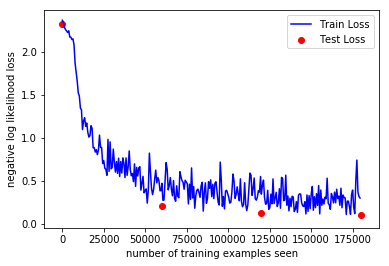

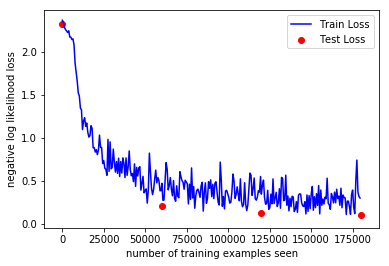

In [29]:
fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')
plt.scatter(test_counter, test_losses, color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')
fig

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


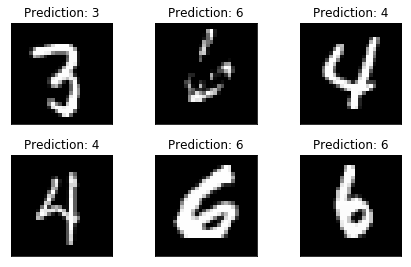

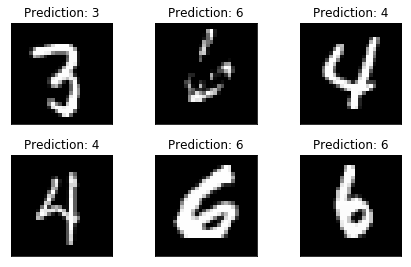

In [30]:
with torch.no_grad():
  output = network(example_data)
fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Prediction: {}".format(
    output.data.max(1, keepdim=True)[1][i].item()))
  plt.xticks([])
  plt.yticks([])
fig

In [5]:
from __future__ import print_function

In [15]:
x=torch.rand(5,3)#.cuda()
y=torch.rand(3,4)#.cuda()
z=torch.mm(x,y)
print(x,y,z)

tensor([[0.4568, 0.4148, 0.4026],
        [0.9667, 0.1643, 0.1426],
        [0.0686, 0.0096, 0.9883],
        [0.2428, 0.2103, 0.7327],
        [0.8624, 0.2339, 0.7303]]) tensor([[0.4973, 0.3509, 0.2256, 0.3892],
        [0.0722, 0.7137, 0.3009, 0.2694],
        [0.8490, 0.4584, 0.0107, 0.6170]]) tensor([[0.5990, 0.6409, 0.2321, 0.5379],
        [0.6137, 0.5219, 0.2690, 0.5084],
        [0.8738, 0.4840, 0.0289, 0.6390],
        [0.7580, 0.5712, 0.1259, 0.6032],
        [1.0658, 0.8044, 0.2727, 0.8492]])


In [8]:
x=torch.zeros(5,3,dtype=torch.long)
print(x,y)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]) tensor([[0.2553, 0.6338, 0.9526],
        [0.8063, 0.1399, 0.0129],
        [0.0991, 0.2291, 0.6796],
        [0.2951, 0.4610, 0.9116],
        [0.6632, 0.3474, 0.0647]])


In [9]:
x=torch.tensor([5.5,3])
print(x)

tensor([5.5000, 3.0000])


In [10]:
x=x.new_ones(5,3,dtype=torch.double)
print(x)
x=torch.randn_like(x,dtype=torch.float)
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
tensor([[ 0.5706, -2.3875,  0.2679],
        [-0.3714, -0.7479,  1.2391],
        [ 0.1079, -0.6992,  0.8471],
        [-0.6667,  1.9401, -1.1033],
        [ 0.1619,  1.3867, -0.7586]])


In [11]:
print(x.size())

torch.Size([5, 3])


In [12]:
print(x,y,x+y)

tensor([[ 0.5706, -2.3875,  0.2679],
        [-0.3714, -0.7479,  1.2391],
        [ 0.1079, -0.6992,  0.8471],
        [-0.6667,  1.9401, -1.1033],
        [ 0.1619,  1.3867, -0.7586]]) tensor([[0.2553, 0.6338, 0.9526],
        [0.8063, 0.1399, 0.0129],
        [0.0991, 0.2291, 0.6796],
        [0.2951, 0.4610, 0.9116],
        [0.6632, 0.3474, 0.0647]]) tensor([[ 0.8259, -1.7537,  1.2205],
        [ 0.4349, -0.6080,  1.2520],
        [ 0.2070, -0.4701,  1.5267],
        [-0.3716,  2.4010, -0.1917],
        [ 0.8251,  1.7341, -0.6939]])


In [18]:
#converting torch tensor to numpy
a=torch.ones(5)
print(a)
b=a.numpy()
print(b)
a.add_(1)
print(a,b)

tensor([1., 1., 1., 1., 1.])
[1. 1. 1. 1. 1.]
tensor([2., 2., 2., 2., 2.]) [2. 2. 2. 2. 2.]


In [20]:
#converting numpy to torch
a=np.ones(5)
print(a)
b=torch.from_numpy(a)
print(b)
np.add(a,1,out=a)
print(a,b)

[1. 1. 1. 1. 1.]
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)
[2. 2. 2. 2. 2.] tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


In [3]:
n_epochs = 3
batch_size_train = 64
batch_size_test = 1000
learning_rate = 0.01
momentum = 0.5
log_interval = 10

random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

In [15]:
train_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('/Users/anujatayal/Documents/codes/',train=True,download=True,
    transform=torchvision.transforms.Compose([
       torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize((0.1307,),(0.3081,))
    ])),batch_size=batch_size_train,shuffle=True)

In [16]:
test_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('/Users/anujatayal/Documents/codes/',train=False,download=True,
    transform=torchvision.transforms.Compose([
       torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize((0.1307,),(0.3081,))
    ])),batch_size=batch_size_test,shuffle=True)

In [18]:
examples=enumerate(test_loader)
batch_idx,(example_data,example_target)=next(examples)
example_data.shape

torch.Size([1000, 1, 28, 28])

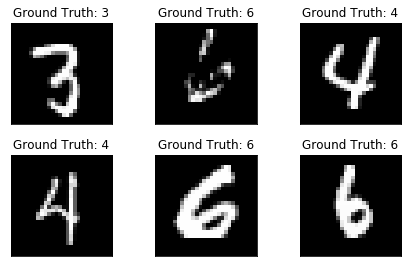

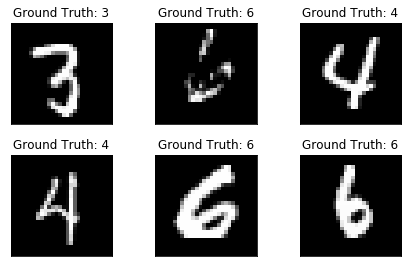

In [21]:
import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(example_target[i]))
  plt.xticks([])
  plt.yticks([])
fig    